In [42]:
from IPython.display import display, HTML
display(HTML("""
<style>
div.container{width:86% !important;}
div.cell.code_cell.rendered{width:100%;}
div.CodeMirror {font family: Consolas; font-size:12pt;}
div.output {font-size:12pt; font-weight:bold;}
div.input {font-family: Consolas; font-size:12pt;}
div.prompt {min-width:70px;}
div#toc-wrapper{padding top:120px;}
div.text_cell_render ul li {font-size:12pt;padding:5px;}
table.dataframe{font-size:12px;}
</style>
"""))

<b><font color = "red" size = "5">  ch05. 함수 </font></b>
- 사용할 코드를 묶어 놓고 그것에 이름을 붙힌 것
- 오버로딩(함수 이름이 같고, 매개변수의 타입이나 갯수로 다른 함수를 허용하는 것) 불가(자바, 파이썬은 불가)
- 함수 정의
```
def 함수명([매개변수1, .. 매개변수n]):
    명령어1
    명령어2
    명령어n
```

# 1절. 함수의 정의 및 사용
## 1.1 함수 정의

In [14]:
# 함수 정의
def my_message(x, msg): # msg를 x번 출력하는 함수
    for i in range(x):
        print(msg)

In [17]:
# 함수 사용
my_message(2, '안녕')

안녕
안녕


In [18]:
my_msg = my_message
my_msg(2, 'hihi :)')

hihi :)
hihi :)


In [19]:
print(type(my_msg), type(my_message))

<class 'function'> <class 'function'>


In [22]:
print('hello') # 파이썬 내장함수 (import 하지 않고 사용할 수 있는 함수)
print = 5
del print
print('hello')

hello
hello


In [23]:
my_message(2, 'hello')

hello
hello


In [29]:
my_message = 5

In [26]:
my_message(1, 3)

TypeError: 'int' object is not callable

In [30]:
del my_message # 내가 만든 함수나 import 함수는 del 해도 복귀되지 않아 사용 불가해짐
# 변수를 삭제해도 함수 사용 불가(파이썬 내장 함수가 아니라서)

In [4]:
# 함수 정의 : 4월 16일(수)
def my_hello():              #자바와 파이썬은 오버로딩이 안되므로 새로만든 def my_hello(cnt)로 바뀜
    print('Hello Python')
    print('Hello World')
def my_hello(cnt):
    for i in range(cnt):
        print('Hello Python')
        print('Hello World')        

In [5]:
# 함수사용 = 함수호출
my_hello(2)

Hello Python
Hello World
Hello Python
Hello World


In [6]:
if __name__ == '__main__':
    my_hello(2)

Hello Python
Hello World
Hello Python
Hello World


In [2]:
import ch05 # ch05모듈을 load

In [3]:
ch05.my_hello(2)

Hello Python
Hello World
Hello Python
Hello World


In [4]:
from ch05 import my_hello # ch05 모듈 안에 my_hello만 load

In [5]:
my_hello(2)

Hello Python
Hello World
Hello Python
Hello World


## 1.2 docstring
- 함수의 설명서 ex) print() ()사이에서 shift + tab, tab / 함수이름.__doc__ 로 docstring만 따로 볼 수 있음

In [7]:
def my_function():
    '''
    함수의 첫라인에 독스트링을 포함할 수 있습니다
    독스트링은 함수의 설명서를 달아주는 역할
    주석보다 많은 기능(shift+tab으로 독스트링을 볼 수 있음)
    '''
    pass

In [10]:
my_function() # shift + tab 으로 해당 함수의 docstring 보기

In [11]:
print(my_function.__doc__) # .__doc__ 명령어로 해당 함수의 docstring 보기


    함수의 첫라인에 독스트링을 포함할 수 있습니다
    독스트링은 함수의 설명서를 달아주는 역할
    주석보다 많은 기능(shift+tab으로 독스트링을 볼 수 있음)
    


In [12]:
def fibonacci(n):
    a, b = 0, 1
    while a < n:
        print(a, end=' ')
        a, b = b, a + b
    print() # 개행

In [16]:
fibonacci(10) # 함수 안에 정의 되어 있는 변수는 호출이 불가함. ex ) a, b 호출시 오류

0 1 1 2 3 5 8 


## 1.3 지역변수(Local Variable)와 전역변수 (Global Variable)

In [18]:
global_var = 100 # 전역변수
def func1():
    print('함수 안에서 실행 :', global_var)
func1()
print('함수 밖에서 실행 :', global_var)

함수안 : 100
함수밖 : 100


In [21]:
def func2():
    local_var = 200 # 지역변수
    print('함수 안에서 실행 :', local_var)
func2()
print('함수 밖에서 실행 :', local_var)

함수안 : 200


NameError: name 'local_var' is not defined

In [24]:
g_var = 100 # 전역변수
def func3():
    g_var = 200 # 지역변수 (변수 선언과 할당)
    print('함수 안에서 실행(지역변수 g_var) :', g_var)
func3()
print('함수 밖에서 실행(전역변수 g_var) :', g_var)

함수 안에서 실행(지역변수 g_var) : 200
함수 밖에서 실행(전역변수 g_var) : 100


In [25]:
# 렉시컬 특성
g_var = 100 # 전역변수
def func4():
    print('함수 안에서 g_var 실행 :', g_var)
    g_var = 200 # 지역변수
func4()

UnboundLocalError: local variable 'g_var' referenced before assignment

In [32]:
# 렉시컬 특성 (Lexical 특성)
g_var = 100 # 전역변수
def func4():
    global g_var # func4() 함수내의 g_var는 전역 변수를 쓴다
    print('함수 안에서 g_var 실행 :', g_var)
    g_var = 200 # 전역변수로 변한 이유는 global 명령어를 함수내에서 사용했기 때문
func4()
print('함수 밖에서 g_var 실행 :', g_var)

함수 안에서 g_var 실행 : 100
함수 밖에서 g_var 실행 : 200


##  1.4 값에 의한 호출
- 함수의 매개변수(인수,인자)로 전달되는 변수가 스칼라 변수(문자 숫자, 논리형)일 때 값이 전달된다

In [34]:
foo = 'a' # 전역변수
id(foo) # 번짓수, 주소 확인

2825650988848

In [45]:
def func1(f): # 매개변수 f는 지역변수
    print('Before :', f, ' id(f) :', id(f))
    f = f * 3
    print('After :', f, ' id(f) :', id(f))
func1(foo)

Before : a  id(f) : 2825650988848
After : aaa  id(f) : 2825771679536


In [51]:
print(foo, ' id(foo) :', id(foo))

a  id(foo) : 2825650988848


## 1.5 참조(주소)에 의한 호출
- 함수의 매개변수(인수,인자)로 전달되는 변수가 리스트, 튜플, 셋, 딕셔너리 객체일 경우

In [37]:
L = [1, 2, 3]
id(L) # 주소 호출

2825723988672

In [50]:
def func2(f): # 매개변수는 지역변수
    print('Before :', f, ' id(f) :', id(f))
    f.append(4)
    print('After :', f, ' id(f) :', id(f))
func2(L)

Before : [1, 2, 3, 4, 4, 4, 4, 4, 4, 4]  id(f) : 2825723988672
After : [1, 2, 3, 4, 4, 4, 4, 4, 4, 4, 4]  id(f) : 2825723988672


In [52]:
print('L =',L, ' id(L) :', id(L))

L = [1, 2, 3, 4, 4, 4, 4, 4, 4, 4, 4]  id(L) : 2825723988672


# 2절. 함수의 실행결과를 반환하는 return

In [ ]:
def add(x, y):
    return x + y

In [ ]:
i = 2; j =3
add(i, j)

In [55]:
def fibonacci_print(n):
    '''
    매개변수로 들어온 n값 미만의 피보나치 수열을 출력
    ex. n=10이면 0 1 1 2 3 5 8을 출력
    '''
    a, b = 0, 1
    while a < n:
        print(a, end=' ')
        a, b = b, a + b
    print() # 개행
    
def fibonacci_return(n):
    '''
    매개변수로 들어온 n값 미만의 피보나치 수열을 리스트로 return
    ex. n=10이면 [0 1 1 2 3 5 8]을 return
    '''
    result = []
    a, b = 0, 1
    while a < n:
        result.append(a)
        a, b = b, a + b
    return result # 반드시 return은 한 개의 값만 리턴할 수 있음

In [54]:
x = fibonacci_print(100)
print(x)

0 1 1 2 3 5 8 13 21 34 55 89 
None


In [58]:
x = fibonacci_return(100)
print(x)
print(type(x))

[0, 1, 1, 2, 3, 5, 8, 13, 21, 34, 55, 89]
<class 'list'>


## 여러개 값 return

In [59]:
def swap(a, b):
    '매개변수의 순서를 바꿔서 return'
    return b, a

In [60]:
x, y = 5, 10
print(f'함수 실행 전 x ={x}, y ={y}')
x, y = swap(x, y)
print(f'함수 실행 후 x ={x}, y ={y}')

함수 실행 전 x =5, y =10
함수 실행 후 x =10, y =5


# 3절. 함수의 매개변수 ★
## 3.1 기본값을 갖는 매개변수

In [63]:
def make_url(ip, port=80): # 순서 인수 > 기본값을 갖는 매개변수 ex. (port=80, ip)로 적을 경우 사용시 (, url) 이런식으로 해야함
    return "http://{}:{}".format(ip, port)

In [65]:
print(make_url('www.naver.com'))
print(make_url('localhost', 8090))
print(make_url(port=8090, ip='localhost'))

http://www.naver.com:80
http://localhost:8090
http://localhost:8090


## 3.2 기본변수를 갖는 매개변수
- 기본변수가 스칼라 변수일 때
- 기본변수가 리스트, 셋, 딕셔너리 등의 객체일 때

In [4]:
i = 5
# 기본값을 갖는 변수가 스칼라 변수일 때 : arg의 기본값은 함수가 정의되는 시점의 값
def func2(arg=i):
    print('arg = ', arg)

In [5]:
i = 50
func2()

arg =  5


In [6]:
list_ = []
# 기본값을 갖는 변수가 객체(데이터구조)일 때 : arg의 기본값은 실행되는 시점으로 바뀜
def func3(data, L=list_):
    'data를 L에 append'
    L.append(data)
    return L

In [7]:
print(func3(10)) # list_가 수정 : [10]

[10]


In [10]:
list_ # call by referance 참조에 의한 변경

[10]

In [9]:
print(func3(20, [10]))

[10, 20]


In [11]:
def func4(data, L=None) :
    if L == None :
        L =[]
    L.append(data)
    return L

In [12]:
print(func4(10))
print(func4(10, list_))

[10]
[10, 10]


## 3.3 튜플 매개변수를 이용한 가변인수 설정

In [ ]:
# 파이썬은 오버로딩(함수의 중복)을 지원하지 않음
def add(a, b):
    return a + b
def add(a, b, c):
    return a + b + c

In [18]:
# *args : 매개변수들을 하나의 튜플 변수 args로 전달받음
def add(*args):
    '전달받은 매개변수들의 합을 return'
    result_tot = 0 # 누적변수
    for data in args:
        result_tot += data
    return result_tot

In [20]:
print(add(1))
print(add(1,2))
print(add(1,2,3,4,5,6,7,8,10))

1
3
46


In [21]:
subject = ('Python', 'Oracle', 'DL', 'ML')
'/'.join(subject)

'Python/Oracle/DL/ML'

In [23]:
def concat(*subject, sep):
    return sep.join(subject)

In [24]:
concat('Python', 'Oracle', 'DL', 'ML', '/')

'Python/Oracle/DL/ML//'

In [ ]:
# 해결책1 : 매개변수(파라미터) 이름을 지정해서 호출
concat('Python', 'Oracle', 'DL', 'ML', sep='/')

In [27]:
# 해결책2 : 기본값을 반드시 갖는 키워드인수 사용 ex. concat(*subject, sep='')
def concat(*subject, sep = '~'):
    return sep.join(subject)

In [26]:
concat('Python', 'Oracle', 'DL', 'ML', '/')

'Python~Oracle~DL~ML~/'

In [30]:
#해결책3 : sep을 순서 인수로 앞에 선언
def concat(sep, *subject):
    return sep.join(subject)

In [31]:
concat('/', 'Python', 'Oracle', 'DL', 'ML')

'Python/Oracle/DL/ML'

## 3.4 딕셔너리 매개변수
- 여러 개의 키워드 인수를 딕셔너리 형태로 받아서 가변키워드 인수로 처리
- *subject : * 한개를 변수 앞에 * 하나를 붙힐 경우 들어오는 여러개의 값을 튜플로 받음 or 튜플 해제
- `**`subject : ** 한개의 변수 앞에 ** 두개를 붙힐 경우 딕셔너리로 반환됨, or 딕셔너리해제
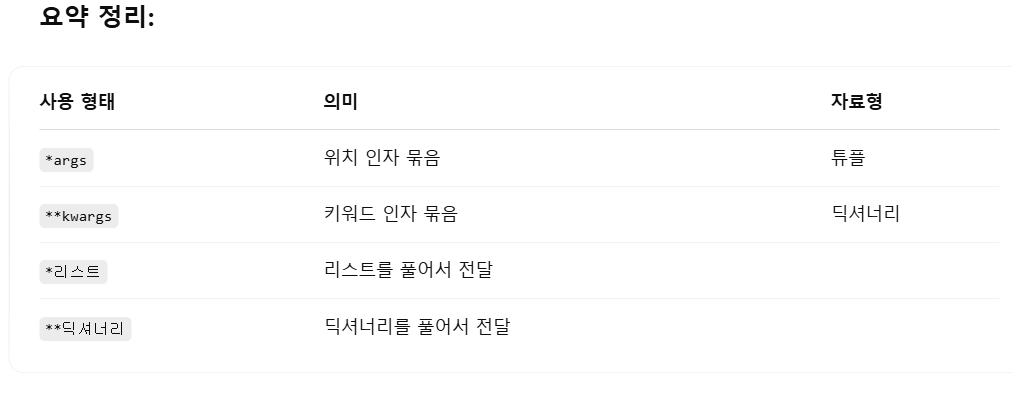

In [39]:
def func5(**kwags):
    print(kwags)
    print(type(kwags))
    print('이름 : ', kwags.get('name', '대마왕'))
    print('나이 : ', kwags.get('age', 30))
    print('주소 : ', kwags.get('adress', '서울'))

In [40]:
func5(name = '홍길동', age = 30, adress = '신림동')

{'name': '홍길동', 'age': 30, 'adress': '신림동'}
<class 'dict'>
이름 :  홍길동
나이 :  30
주소 :  신림동


## 3.5 함수정의시 매개변수 순서
- 순서인수 > 튜플매개변수(`*`) > 키워드인수(매개변수이름반드시명시) > 딕셔너리매개변수(`**`)

In [43]:
def func6(a, b, *c, **d):
    print('순서인수 a :', a)
    print('순서인수 b :', b)
    print('튜플인수 c :', c)
    print('딕셔너리 인수 d :', d)

In [44]:
func6(10, 20, 1, 2, 3, 4, 5, 6, 7, 8, 9, name='홍길동', age=30, address='서울')

순서인수 a : 10
순서인수 b : 20
튜플인수 c : (1, 2, 3, 4, 5, 6, 7, 8, 9)
딕셔너리 인수 d : {'name': '홍길동', 'age': 30, 'address': '서울'}


In [45]:
def func7(a, b, *c, d='기본값', **e):
    print('순서인수 a :', a)
    print('순서인수 b :', b)
    print('튜플인수 c :', c)
    print('키워드인수(기본값을 갖는 인수, 호출시 매개변수명 반드시 명시) d :', d)
    print('딕셔너리인수 e :', e)

In [46]:
func7(10, 20, 1, 2, 3, d='다른 것', fontsize=12, fontfamily='consola')

순서인수 a : 10
순서인수 b : 20
튜플인수 c : (1, 2, 3)
키워드인수(기본값을 갖는 인수, 호출시 매개변수명 반드시 명시) d : 다른 것
딕셔너리인수 e : {'fontsize': 12, 'fontfamily': 'consola'}


In [47]:
func7(10, 20, 1, 2, 3, '다른 것', fontsize=12, fontfamily='consola')

순서인수 a : 10
순서인수 b : 20
튜플인수 c : (1, 2, 3, '다른 것')
키워드인수(기본값을 갖는 인수, 호출시 매개변수명 반드시 명시) d : 기본값
딕셔너리인수 e : {'fontsize': 12, 'fontfamily': 'consola'}


## 3.6 인수(매개변수)의 언패킹
### 튜플인수 언패킹
- 튜플,리스트 언패킹 : 함수 호출시 매개변수 앞에 `*` 붙힘
- 튜플,리스트 패킹 : 함수 정의시 매개변수 앞에 `*` 붙힘

In [55]:
def add(*args):
    print(args)
    tot = 0
    for num in args:
        tot += num
    return tot

In [51]:
add(1, 2, 3, 4)

10

In [53]:
numbers = [1, 2, 3, 4]
add(*numbers) # 언패킹

10

In [54]:
numbers = (1, 2, 3, 4)
add(*numbers) # 언패킹

10

### 딕셔너리인수 언패킹
- 딕셔너리 언패킹 : 함수 호출시 매개변수 앞에 `**` 붙힘
- 딕셔너리 패킹 : 함수 정의시 매개변수 앞에 `**` 붙힘

In [56]:
def func5(**data):
    print(type(data))
    for key, item in data.items():
        print(f'{key}:{item}')

In [57]:
func5(name = '홍길동', age = 30, address = '신림')

<class 'dict'>
name:홍길동
age:30
address:신림


In [60]:
customInfo = {'name':'홍길동', 'age':30, 'address':'서울시 강남구', 'score':900}
func5(**customInfo)

<class 'dict'>
name:홍길동
age:30
address:서울시 강남구
score:900


# 4절. 람다식
- return 한줄짜리 작은 익명함수
## 4.1 람다식 연습

In [61]:
def add(a, b):
    return a+b
add(3, 4)

7

In [63]:
add2 = lambda a, b : a + b
add2(1, 2)

3

In [64]:
type(add), type(add2)

(function, function)

In [66]:
(lambda a, b : a + b)(3, 4) # 람다는 괄호로 묶어준 후 뒤에 변수 값을 대입하면 됨

7

In [2]:
# ex1. 매개변수로 들어온 값이 짝수인지 홀수인지 return
#def ex1(num):
#    if num % 2 :
#        result = "홀수"
#    else:
#        result = "짝수"
#    return result
#result = "홀수" if num%2 else "짝수"
#return "홀수" if num%2 else "짝수"

ex1 = lambda num : "홀수" if num%2 else "짝수"
ex1(10), ex1(-9)

('짝수', '홀수')

In [5]:
# ex2. 두 매개변수의 차이를 return
ex2 = lambda a, b: a-b if a > b else b-a
ex2(3, 2)

1

In [10]:
ex2 = lambda a, b : a-b if a>b else b-a
print(ex2(2, 1), ex2(10,20))
print(type(ex2))
# def diff(a, b):
# #     if a>b:
# #         result = a-b
# #     else:
# #         result = b-a
#      result = a-b if a>b else b-a
#      return result
# diff(2,1), diff(10, 20)

1 10
<class 'function'>


In [11]:
# ex3. 매개변수로 잔액을 받아 양수면 잔액을 return, 음수면 'negative'를 return
ex3 = lambda money : money if money >= 0 else 'negative'
ex3(1), ex3(-1)

(1, 'negative')

In [21]:
# ex4. 점수를 입력받아 점수가 80점이상은 A팀, 60점이상은 B팀, 60점미만은 재시험, 그 외는 유효하지 않음

ex4 = lambda score : "A팀" if 80<=score<=100 else \
                        "B팀" if 60<=score<80 else \
                        "재시험" if 0<=score<60 else \
                        "유효하지않음"

ex4(120), ex4(90), ex4(70), ex4(50)

('유효하지않음', 'A팀', 'B팀', '재시험')

In [4]:
# ex5. safe_index를 람다식으로 변환하여 작성
ex5 = lambda vector, data : vector.index(data) if data in vector else -1
ex5([1,2,3], 0), ex5([1,2,3], 3)

(-1, 2)

In [ ]:
def safe_index(vector, data):
    if data in vector: #lst 안에 data가 있으면 True, 없으면 False
        return vector.index(data) # 리스트 안에 data가 몇번째 인덱스인지 반환
    else:
        return -1 # 없으면 -1을 반환

## 4.2 함수의 매개변수에 람다식 이용

### (1) map

In [5]:
def map_template(func, L=[]):
    '''
    L의 모든 요소를 func()함수를 적용시켜 return
    [func(l) for l in L ]
    '''
    result = [] #리턴할 변수
    for l in L:
        result.append(func(l))
    return result
#     result = [func(l) for l in L]
#     return func(l) for l in L

In [6]:
list_data = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
def x_2(x):
    return x*2
map_template(x_2, list_data)

[2, 4, 6, 8, 10, 12, 14, 16, 18, 20]

In [7]:
# 리스트(튜플)등 벡터데이터를 가공하는 방법 1. map
list_data = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
map_template(lambda x : x*2, list_data)

[2, 4, 6, 8, 10, 12, 14, 16, 18, 20]

In [8]:
# 리스트 데이터 가공 방법 : 2. 리스트 컴프리핸션
list_data = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
[l*2 for l in list_data]

[2, 4, 6, 8, 10, 12, 14, 16, 18, 20]

In [ ]:
# 리스트 데이터 가공 방법 : 3. map() : 파이썬 내장함수
list_data = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
list(map(lambda x : x*2, list_data))

In [9]:
for item in map(lambda x : x*2, list_data):
    print(item, end=' ')

2 4 6 8 10 12 14 16 18 20 

In [13]:
'''
예제 1. 결과값 = [5000, 800, 1000, 6000]으로 바꾸시오
'''
prices = ['5,000', '800', '1000', '6,000']
result = list(map(lambda x : int(x.replace(',', '')), prices))

print(result)

[5000, 800, 1000, 6000]


In [15]:
def func(x):
    return int(x.replace(',',''))
func("5,000"), func("1800")

(5000, 1800)

In [16]:
list(map(lambda x : int(x.replace(',','')), prices))

[5000, 800, 1000, 6000]

In [11]:
'''
예제 2. member1 = [{'name':'홍길동', 'birth':'2000-01-01'},
                   {'name':'신길동', 'birth':'1998-12-31'},] 를
        member2 = [{'name':'홍길동', 'year':2000, 'month':1, 'day':1},
                   {'name':'신길동', 'year':1998, 'month':12, 'day':31},] 를 바꿉니다
'''
member1 = [{'name':'홍길동', 'birth':'2000-01-01'},
           {'name':'신길동', 'birth':'1998-12-31'}]

# 리스트 내 각 딕셔너리에서 birth 값을 분리하여 새 딕셔너리로 변환
member2 = list(map(lambda m: {
                    'name': m['name'],
                    'year': int(m['birth'].split('-')[0]),
                    'month': int(m['birth'].split('-')[1]),
                    'day': int(m['birth'].split('-')[2])
                }, member1))

print(member2)

[{'name': '홍길동', 'year': 2000, 'month': 1, 'day': 1}, {'name': '신길동', 'year': 1998, 'month': 12, 'day': 31}]


In [17]:
# '2000-01-01' => {'year':1998, 'month':12, 'day':31}
def split_date(date):
    split_data = date.split('-')
#     print(split_data[0], split_data[1], split_data[2])
    return {'year': int(split_data[0]),
           'month': int(split_data[1]),
           'day'  : int(split_data[2])
           }

In [18]:
split_date("2000-01-01")

{'year': 2000, 'month': 1, 'day': 1}

In [19]:
def member_func(member): # {'name':'홍길동', 'birth':'2000-01-01'}
    "{'name':'신길동', 'year':1998, 'month':12, 'day':31}식으로 return"
    return {
        'name':member.get('name'),
        'year':int(member['birth'].split('-')[0]),
        'month':int(member['birth'].split('-')[1]),
        'day':int(member['birth'].split('-')[2]),
    }
member_func(member1[0])

{'name': '홍길동', 'year': 2000, 'month': 1, 'day': 1}

In [26]:
member2 =list(map(lambda member : {
                        'name':member.get('name'),
                        'year':int(member['birth'].split('-')[0]),
                        'month':int(member['birth'].split('-')[1]),
                        'day':int(member['birth'].split('-')[2]),
                        } ,
         member1
        )
    )
member2

[{'name': '홍길동', 'year': 2000, 'month': 1, 'day': 1},
 {'name': '신길동', 'year': 1998, 'month': 12, 'day': 31}]

In [27]:
'예제 3. member2를 member1로 바꿉니다'
member2 = [{'name':'홍길동', 'year':2000, 'month':1, 'day':1},
           {'name':'신길동', 'year':1998, 'month':12, 'day':31}]

# member2의 각 딕셔너리에서 year, month, day를 결합하여 birth 형식으로 변경
member1 = list(map(lambda m: {
                    'name': m['name'],
                    'birth': f"{m['year']}-{m['month']:02d}-{m['day']:02d}"
                }, member2))

print(member1)

[{'name': '홍길동', 'birth': '2000-01-01'}, {'name': '신길동', 'birth': '1998-12-31'}]


In [43]:
# {'year': 2000, 'month': 1, 'day': 1} => "2000-01-01"를 return하는 함수
def join_date(data):
    # print([data.get('year'), data.get('month'), data.get('day')])
    year = str(data.get('year'))
    month = data.get('month')
    if month < 10:
        month = '0'+str(month)
    else:
        month = str(month)
    day = data.get('day')
    if day < 10:
        day = '0'+str(day)
    else:
        day = str(day)
    return '-'.join([year, month, day])

In [44]:
def join_date(data):
    print("{}-{:02}-{:02}".format(data.get('year'), 
                                  data.get('month'), 
                                  data.get('day')))

In [48]:
def join_date(data):
    print("{year}-{month:02}-{day:02}".format(
                                  year = data.get('year'), 
                                  month=data.get('month'), 
                                  day=data.get('day')))

In [49]:
def join_date(data):
    return "{year}-{month:02}-{day:02}".format(**data)

In [50]:
join_date({'year': 2000, 'month': 1, 'day': 1})

'2000-01-01'

In [51]:
member2

[{'name': '홍길동', 'year': 2000, 'month': 1, 'day': 1},
 {'name': '신길동', 'year': 1998, 'month': 12, 'day': 31}]

In [53]:
# {'name':'홍길동', 'year':2000, 'month':1, 'day':1}(member2)를 
# {'name':'홍길동', 'birth':'2000-01-01'}으로 가공
list(map(lambda member : {
                        'name' : member.get('name'),
                        'birth': "{year}-{month:02}-{day:02}".format(**member)
                        },
    member2
))

[{'name': '홍길동', 'birth': '2000-01-01'},
 {'name': '신길동', 'birth': '1998-12-31'}]

### (2) filter 
- map처리 : [1,2,3,4,5] => [2,4,6,8,10] (벡터의 모든 데이터를 가공)
- filter : [1,2,3,4,5] => [2,4] (원하는 정보를 추출)
* cf. 리스트 컴프리헨션 

In [54]:
# [1, 2, 3, 4, 5] =>
def filter_template(func, L=[]):
    result = []
    for l in L:
        if func(l):
            result.append(l)
    return result

In [55]:
def evenChk(value):
    return value%2 == 0
evenChk(10), evenChk(-9)
#     if value%2:
#         return False
#     else:
#         return True

(True, False)

In [57]:
list_data = [1, 2, 3, 4, 5]
filter_template(lambda value : value%2==0, list_data)

[2, 4]

In [59]:
list(filter(lambda value : value%2 == 0, list_data))

[2, 4]

In [60]:
[data for data in list_data if data%2 == 0]

[2, 4]

###  (3) sort

In [62]:
p = [9, 2, 7]
p.sort(reverse=True)
p

[9, 7, 2]

In [66]:
# 무조건 0번째 item 기준으로 정렬
pairs = [(2, 'two'), (1, 'one'), (4, 'four'), (3, 'three')]
pairs.sort()
pairs

[(1, 'one'), (2, 'two'), (3, 'three'), (4, 'four')]

In [67]:
# 1번째 item 기준으로 정렬(abc순)
pairs.sort(key=lambda pair : pair[1])
pairs

[(4, 'four'), (1, 'one'), (3, 'three'), (2, 'two')]

In [65]:
# 무조건 0번째 item 기준으로 정렬
number2d = [[9, 9, 9, 9, 9],
            [1, 100],
            [10, 1],]
number2d.sort(reverse=True)
number2d

[[10, 1], [9, 9, 9, 9, 9], [1, 100]]

In [69]:
# 리스트를 매개변수로 받아 합을 return
(lambda item : sum(item))([1,2,3])

6

In [72]:
# 합이 큰 순으로 정렬
number2d.sort(key = lambda item : sum(item), reverse=True)
number2d

[[1, 100], [9, 9, 9, 9, 9], [10, 1]]

In [94]:
students = [
    {'name':'홍길동', 'score':90},
    {'name':'김길동', 'score':50},
    {'name':'윤길동', 'score':99},
#    {'score':100}
]

In [95]:
# 이름순으로 정렬(ㄱㄴㄷ순)
a =students.sort(key=lambda item : item['score'])
students

[{'name': '김길동', 'score': 50},
 {'name': '홍길동', 'score': 90},
 {'name': '윤길동', 'score': 99}]

In [96]:
# 1번 정답
students.sort(key = lambda item : item.get('name'))
students

[{'name': '김길동', 'score': 50},
 {'name': '윤길동', 'score': 99},
 {'name': '홍길동', 'score': 90}]

In [104]:
# score순으로 정렬(내림차순)
students.sort(key = lambda item : item.get('score'), reverse=True)
students

[{'score': 100},
 {'name': '윤길동', 'score': 99},
 {'name': '홍길동', 'score': 90},
 {'name': '김길동', 'score': 50}]

In [98]:
students = [
    {'name':'홍길동', 'score':90},
    {'name':'김길동', 'score':50},
    {'name':'윤길동', 'score':99},
    {'score':100}
]

In [101]:
# 이름순으로 정렬(ㄱㄴㄷ순) 이름없는것 포함문제
students.sort(key = lambda item : item.get('name', '힣')) # get('name', '가') 뒤에서 순서를 ㄱㄴㄷ으로 정하기 때문에
students

[{'name': '김길동', 'score': 50},
 {'name': '윤길동', 'score': 99},
 {'name': '홍길동', 'score': 90},
 {'score': 100}]

In [102]:
# 이름순으로 정렬(ㄱㄴㄷ순) 이름없는것 포함문제
students.sort(key = lambda item : item.get('score', 0), reverse=True)
students

[{'score': 100},
 {'name': '윤길동', 'score': 99},
 {'name': '홍길동', 'score': 90},
 {'name': '김길동', 'score': 50}]

In [1]:
# 책 제목순 정렬(ㄱㄴㄷ순), 저자순 정렬(ㄱㄴㄷ순), 가격순 정렬(오름차순)
books =[
    {'no':1, 'title':'강남 아파트 인사이트', 'writer':'오스틀로이드', 'price':'25,200'},
    {'no':2, 'title':'단 한 번의 삶', 'writer':'김영하', 'price':'18,100'},
    {'no':3, 'title':'흔한 남매 19', 'writer':'백난도', 'price':'14220'},
    {'no':4, 'title':'가격이잘못', 'writer':'홍길동', 'price':'-'},
    {'no':5, 'title':'가격이숫자', 'writer':'신길동', 'price':900},
    {'no':6, 'title':'가격이없음', 'writer':'김길동'},
]

In [2]:
books.sort(key = lambda book : book.get('no', 0)) # get('name', '가') 뒤에서 순서를 ㄱㄴㄷ으로 정하기 때문에
books

[{'no': 1, 'title': '강남 아파트 인사이트', 'writer': '오스틀로이드', 'price': '25,200'},
 {'no': 2, 'title': '단 한 번의 삶', 'writer': '김영하', 'price': '18,100'},
 {'no': 3, 'title': '흔한 남매 19', 'writer': '백난도', 'price': '14220'},
 {'no': 4, 'title': '가격이잘못', 'writer': '홍길동', 'price': '-'},
 {'no': 5, 'title': '가격이숫자', 'writer': '신길동', 'price': 900},
 {'no': 6, 'title': '가격이없음', 'writer': '김길동'}]

In [3]:
books.sort(key = lambda book : book.get('title', 0))
books

[{'no': 5, 'title': '가격이숫자', 'writer': '신길동', 'price': 900},
 {'no': 6, 'title': '가격이없음', 'writer': '김길동'},
 {'no': 4, 'title': '가격이잘못', 'writer': '홍길동', 'price': '-'},
 {'no': 1, 'title': '강남 아파트 인사이트', 'writer': '오스틀로이드', 'price': '25,200'},
 {'no': 2, 'title': '단 한 번의 삶', 'writer': '김영하', 'price': '18,100'},
 {'no': 3, 'title': '흔한 남매 19', 'writer': '백난도', 'price': '14220'}]

In [4]:
books.sort(key = lambda book : book.get('writer', 0))
books

[{'no': 6, 'title': '가격이없음', 'writer': '김길동'},
 {'no': 2, 'title': '단 한 번의 삶', 'writer': '김영하', 'price': '18,100'},
 {'no': 3, 'title': '흔한 남매 19', 'writer': '백난도', 'price': '14220'},
 {'no': 5, 'title': '가격이숫자', 'writer': '신길동', 'price': 900},
 {'no': 1, 'title': '강남 아파트 인사이트', 'writer': '오스틀로이드', 'price': '25,200'},
 {'no': 4, 'title': '가격이잘못', 'writer': '홍길동', 'price': '-'}]

In [5]:
# '14,000' -> 14000 / "2000" -> 2000 / 800 -> 800 / '-' -> 0
def parse_int(price):
    #print(type(price))
    if isinstance(price, str) and price.replace(',', '').isdigit():
        return int(price.replace(',', ''))
    elif isinstance(price, int):
        return price
    else:
        return 0

In [6]:
parse_int(8000), parse_int('8000'), parse_int("8,000"), parse_int('-')

(8000, 8000, 8000, 0)

In [7]:
# {'no': 6, 'title': '가격이없음', 'writer': '김길동'}, => 0 return
# {'no': 3, 'title': '흔한 남매 19', 'writer': '백난도', 'price': '14220'}, => 14220
# {'no': 5, 'title': '가격이숫자', 'writer': '신길동', 'price': 900}, => 900
def parse_int(book):
    if isinstance(book.get('price'), str) and \
            book.get('price').replace(',','').isdigit(): #if1
        return int(book.get('price').replace(',','')) #1
    elif isinstance(book.get('price'), int): #if2
        return book.get('price') #2
    else:
        return 0 #3

In [14]:
parse_int(books[0]), parse_int(books[3]), parse_int(books[2]), parse_int(books[5]),

(0, 900, 14220, 0)

In [17]:
# 책 제목순 정렬(ㄱㄴㄷ순), 저자순 정렬(ㄱㄴㄷ순), 가격순 정렬(오름차순)
books =[
    {'no':1, 'title':'강남 아파트 인사이트', 'writer':'오스틀로이드', 'price':'25,200'},
    {'no':2, 'title':'단 한 번의 삶', 'writer':'김영하', 'price':'18,100'},
    {'no':3, 'title':'흔한 남매 19', 'writer':'백난도', 'price':'14220'},
    {'no':4, 'title':'가격이잘못', 'writer':'홍길동', 'price':'-'},
    {'no':5, 'title':'가격이숫자', 'writer':'신길동', 'price':900},
    {'no':6, 'title':'가격이없음', 'writer':'김길동'},
]
copy_books = books.copy() #원본 카피

In [21]:
# key = lambda #1 -> #if1 -> #2 -> #f2 -> #3
copy_books.sort(key = lambda book : 
                int(book.get('price').replace(',', ''))\
                if isinstance(book.get('price'), str) and \
                    book.get('price').replace(',','').isdigit() else \
                book.get('price') if isinstance(book.get('price'), int) else \
                0
               )

In [22]:
copy_books

[{'no': 4, 'title': '가격이잘못', 'writer': '홍길동', 'price': '-'},
 {'no': 6, 'title': '가격이없음', 'writer': '김길동'},
 {'no': 5, 'title': '가격이숫자', 'writer': '신길동', 'price': 900},
 {'no': 3, 'title': '흔한 남매 19', 'writer': '백난도', 'price': '14220'},
 {'no': 2, 'title': '단 한 번의 삶', 'writer': '김영하', 'price': '18,100'},
 {'no': 1, 'title': '강남 아파트 인사이트', 'writer': '오스틀로이드', 'price': '25,200'}]

In [23]:
books

[{'no': 1, 'title': '강남 아파트 인사이트', 'writer': '오스틀로이드', 'price': '25,200'},
 {'no': 2, 'title': '단 한 번의 삶', 'writer': '김영하', 'price': '18,100'},
 {'no': 3, 'title': '흔한 남매 19', 'writer': '백난도', 'price': '14220'},
 {'no': 4, 'title': '가격이잘못', 'writer': '홍길동', 'price': '-'},
 {'no': 5, 'title': '가격이숫자', 'writer': '신길동', 'price': 900},
 {'no': 6, 'title': '가격이없음', 'writer': '김길동'}]

In [25]:
# 람다식 테스트 (오타 확인)
(lambda book : 
                int(book.get('price').replace(',', ''))\
                if isinstance(book.get('price'), str) and \
                    book.get('price').replace(',','').isdigit() else \
                book.get('price') if isinstance(book.get('price'), int) else \
                0
               )(books[0])

25200

## 4.3 return문에 람다식 이용

In [3]:
#함수를 return
def make_box(shape): # shape : [길이l] => len가 l인 list를 생성하는 함수 return, 
                     # shape : 2차원이면 [r,c] => r행 c열인 list를 생성하는 함수, 
                     # shape : 3차원이면 [d,r,c] => d면 r행 c열 3차원 list를 생성하는 함수
    def box(init_value):
        if len(shape)==1: 
            return [init_value]*shape[0]
        elif len(shape)==2:
            return [ [init_value]*shape[1] ] * shape[0]
    return box

In [4]:
line_func = make_box([2,3])
line_func(3)

[[3, 3, 3], [3, 3, 3]]

In [5]:
line_func1 = make_box([10])
line_func1(3)

[3, 3, 3, 3, 3, 3, 3, 3, 3, 3]

In [6]:
def make_box(shape):
    if len(shape)==1:
        return lambda init_value : [init_value] * shape[0]
    elif len(shape)==2:
        return lambda init_value : [ [init_value] * shape[1] ] * shape[0]

In [7]:
line_func1 = make_box([10])
line_func1(3)

[3, 3, 3, 3, 3, 3, 3, 3, 3, 3]

In [8]:
line_func = make_box([2,3])
line_func(3)

[[3, 3, 3], [3, 3, 3]]

# 5절. 파이썬 내장함수
- import 하지 않고 바로 사용 가능한 함수
- 키워드처럼 간주되므로, 식별자(변수명, 함수명, 클래스명)로 사용하는 것을 피한다

In [ ]:
globals() # 전역변수 리스트

In [9]:
all([True, True, True, False]) # 전부 True인지 여부

False

In [ ]:
round(3.5) # 반올림하는 함수

In [11]:
import numpy as np # numpy 모듈을 np라는 이름으로 load
np.round(3.5), np.ceil(3.5), np.floor(3.5) # 반올림, 올림, 내림

(4.0, 4.0, 3.0)

## 연습문제

In [12]:
#1.함수의인자로 리스트를 받은 후 리스트 내에 있는 모든 정수값에 대한 최대값과 최소값을 리턴하는 함수를 작성하세요
def get_max_min(data_list):
    return max(data_list), min(data_list)

get_max_min = lambda data_list : (max(data_list), min(data_list))
get_max_min([1,2,3,4,5,6,])

(6, 1)

In [15]:
#2.체질량 지수(Body Mass Index, BMI)는 체중과 키를 이용해 비만도를 나타내는 지수로 아래의 수식에 의해 계산됩니다. 
#  함수의 인자로 체중(kg)과 신장(m)를입력받은 후 BMI값에 따라 ‘마른 체형‘, ‘표준‘, ‘비만‘, ‘고도비만‘ 
#  중 하나의 상태를 출력하는 함수를 구현해 보세요.
getBMI(kg, m):
BMI지수 = 체중(kg) / 신장(m)의 제곱
BMI<18.5 : 마른체형
18.5<=BMI<25 : 표준
25<=BMI<30 : 비만
BMI >=30 : 고도비만

SyntaxError: invalid syntax (2384023342.py, line 4)

In [ ]:
kg = int(input('몸무게는?'))
m1 = int(input('키는?'))
m = m1/100
def getBMI(kg, m):
    bmi = kg / (m ** 2)
    if bmi < 18.5:
        return "마른 체형"
    elif 18.5 <= bmi < 25:
        return "표준"
    elif 25 <= bmi < 30:
        return "비만"
    else:
        return "고도비만"
print(getBMI(kg, m))

In [ ]:
# 3.직각삼각형의 밑변과 높이를 입력받은 후 삼각형의 면적과 둘레를 계산하는 함수를 작성하세요
#  리턴값은 면적과 둘레를 return하도록 구현하세요
#  math.sqrt() : 제곱근을 구하는 함수이용 (ex)math.sqrt(25) : 5.0
import math

def get_triangle(width, height):
    # 면적 = (밑변 × 높이) / 2
    area = (width * height) / 2
    
    # 빗변 = √(밑변² + 높이²)
    hypotenuse = math.sqrt(width**2 + height**2)
    
    # 둘레 = 밑변 + 높이 + 빗변
    perimeter = width + height + hypotenuse
    
    return area, perimeter

# 예시 실행
print(get_triangle(3, 4))

In [19]:
#4.함수의 인자로 시작과 끝 숫자가 주어질 때 시작부터 끝까지의 모든 정수값의 합을 리턴하는 함수를 작성하세요(시작값과 끝값 포함).
def mysum(fRom, end):
    return sum(range(fRom, end))
print(mysum(1,5))

10


In [33]:
#5.함수의인자로 문자열을 포함하는 리스트가 입력될 때 각 문자열의 첫 세글자로만 구성된 리스트를 리턴하는 함수와 람다식을 작성하세요
# 예를 들어 함수의 입력으로 [‘Seoul’, ‘Daegu’, ‘Kwangju’, ‘Jeju’]가 입력될 때 함수의 리턴값은 [‘Seo’, ‘Dae’, ‘Kwa’,’Jej’]
lst = ['Seoul', 'Daegu', 'Kwangju', 'Jeju']

def get_abbrs(lst):
    return [word[:3] for word in lst]
print(get_abbrs(lst))

['Seo', 'Dae', 'Kwa', 'Jej']


In [39]:
#6. 다음 코드를 람다 함수 형태로 수정할 때 알맞은 코드를 작성하시오

def f(x,y):
    return x ** y
a = lambda x, y : x**y
a(2,3)

8

In [36]:
#7. ex = [1,2,3,4,5]를 [1,4,9,16,25]의 결과를 얻을 수 있도록 람다함수와 map()함수를 사용하여 구현과 리스트 컴프리헨션으로 구현하시오
ex = [1, 2, 3, 4, 5]
a = [i**2 for i in ex]
print(a)
[1, 4, 9, 16, 25]
ex = [1, 2, 3, 4, 5]
list(map(lambda x: x**2 , ex))
[1, 4, 9, 16, 25]

NameError: name '________________________' is not defined

In [40]:
a = [i**2 for i in ex]
print(a)

[1, 4, 9, 16, 25]


In [44]:
list(map(lambda x: x**2 , ex))

[1, 4, 9, 16, 25]

In [ ]:
#8. 다음코드를 각각 실행하면 서로 다른 결과가 나온다. 이런 결과가 나오는 이유를 서술하시오
a = [1, 2, 3]
print(*a) # * 은 딕셔너리를 언패킹함
1 2 3
print(a) # 언패킹되지 않은 딕셔너리
[1, 2, 3]

In [1]:
#9. 다음 코드의 실행 결과는?
date_info={'year':2024, 'month':9, 'day':6}
result ='{year}-{month}-{day}'.format(**date_info)
result # 2024-9-6

'2024-9-6'

In [3]:
# 9번문제에서 날짜형식으로 출력하는 방법 2024-9-6을 2024-09-06 형태로 변환하는 방법
date_info={'year':2024, 'month':9, 'day':18}
result ='{year}-{month:02}-{day:02}'.format(**date_info)
result # 2024-09-18

'2024-09-18'

In [4]:
# 9번문제에서 날짜형식으로 출력하는 방법2 데이터가 문자로 들어온 경우
date_info={'year':2024, 'month':'4', 'day':'1'}
result ='{year}-{month:>02}-{day:>02}'.format(**date_info)
result # 2024-09-6

'2024-04-01'

In [5]:
#10. n개의 벡터(리스트나 튜플, 셋등)의 크기들이 같은지 여부를 reutrn하는
#    vector_size_check(*vector_var) 를 한 줄의 코드(리스트 컴프리헨션 이용)로 작성하시오.
def vector_size_check(*vector_var):
    result =[]
    for vector in vector_var:
        result.append(len(vector))
    return result

def vector_size(*vector_var):
    return[len(vector) for vector in vector_var]

vector_size([10,20], (100,200), {'name':'홍', 'age':20}, {1,2})


[2, 2, 2, 2]

In [14]:
# 입력받은 n개의 벡터(리스트나 튜플이나 셋)의 크기들이 모두 같은지 여부 return : 셋 이용
def vector_size_check(*vector_var):
    return len(set([len(vector) for vector in vector_var])) == 1

vector_size_check([10,20], (100,200), {'name':'홍', 'age':20}, {1,2})

True

In [12]:
all([5, 5, 5])

True

In [53]:
#10 -함수
def vector_size_check(*vector_var):
    return len({len(v) for v in vector_var}) == 1
print(vector_size_check([1, 2], (3, 4), {5, 6}))   
print(vector_size_check([1, 2, 3], (4, 5), {6, 7})) 

True
False


In [ ]:
#10 -람다
vector_size_check = lambda *vector_var: len({len(v) for v in vector_var}) == 1

In [54]:
# 위에 함수를 for나 if문을 활용하면
def vector_size_check(*vector_var):
    # 첫 번째 벡터의 길이를 기준으로 잡고
    first_len = len(vector_var[0])
    
    # 모든 벡터의 길이가 첫 번째와 같은지 확인
    for v in vector_var:
        if len(v) != first_len:
            return False
    return True

In [ ]:
# 11. 다음과 같은 결과를 얻기 위해 하나의 스칼라값을 리스트나 튜플, 셋등 벡터에 곱하는 코드를 작성하시오.
#     (단 입력되는 벡터의 크기는 일정하지 않음)
scalar_vector_product(5, [1,2,3,4])
[5, 10, 15, 20]

In [65]:
def scalar_vector_product(scalar, vector):
    return [scalar * i for i in vector]

print(scalar_vector_product(5, [1, 2, 3, 4]))

[5, 10, 15, 20]


In [66]:
result = list(map(lambda x: x * 5, [1, 2, 3, 4]))
print(result)

[5, 10, 15, 20]


### 서술형

In [14]:
#1. 다음코드의 실행 결과는?
pairs = [(1, 'd'), (2, 'c'), (3, 'b'), (4, 'a')]
pairs.sort(key=lambda pair: pair[1])
pairs

[(4, 'a'), (3, 'b'), (2, 'c'), (1, 'd')]

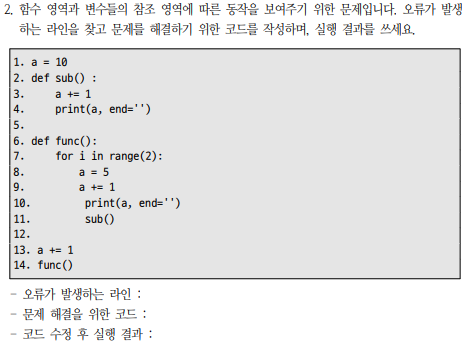

In [76]:
# 2번
a=10
def sub():
    global a # <= 전역변수를 쓰겠다 선언해야함
    a += 1
    print(a, end='')

def func():
    for i in range(2):
        a = 5
        a += 1
        print(a, end='')
        sub()
        
a += 1
func()

612613

In [83]:
# 3. 다음구문을 실행한 결과는
var = 100
def func(var):
    var = 200
func(var)
print(func(var)) # None
print(var) # 전역변수

None
100


In [80]:
# 4. 다음구문의실행 결과는?
def my_func(func, *args):
    return func(*args)
import numpy as np
my_func(np.add, 2, 3)

5

In [84]:
# 5. 다음구문의 실행결과는? 9
def my_func(func, *args):
    return func(*args)
my_func(lambda a, b : a**b, 3, 2)

9

In [ ]:
# 6. 파이썬 함수에 대한 설명 중 잘못된 것은? 1

# 1. 파이썬의 함수는 중복 정의해 사용할 수 있다.
# 2. 파이썬의 함수 매개변수는 기본값을 가질 수 있다.
# 3. **args 형식의 매개변수가 있으면 키워드 인수는 딕셔너리 형식으로 받는다.
# 4. 함수를 호출할 때 매개변수 이름이 없는 인수는 매개변수 이름이 있는 인수보다 앞에 와야 한다.

In [87]:
# 7.다음과 같은 구문이 있을 경우 오류가 발생하는 함수 호출은? 4
list_ = []
def func(a, L=None):
    if L is None:
        L = []
    L.append(a)
    return L

In [89]:
# 8. 다음 보기가 설명하는 것을 작성하기 위한 키워드를 쓰세요.(영문 소문자로 쓰세요.)
# lambda

### 개발 공부 순서 아래에서 위 순서 ( 공통 => 핵심 => 실무 순서 )
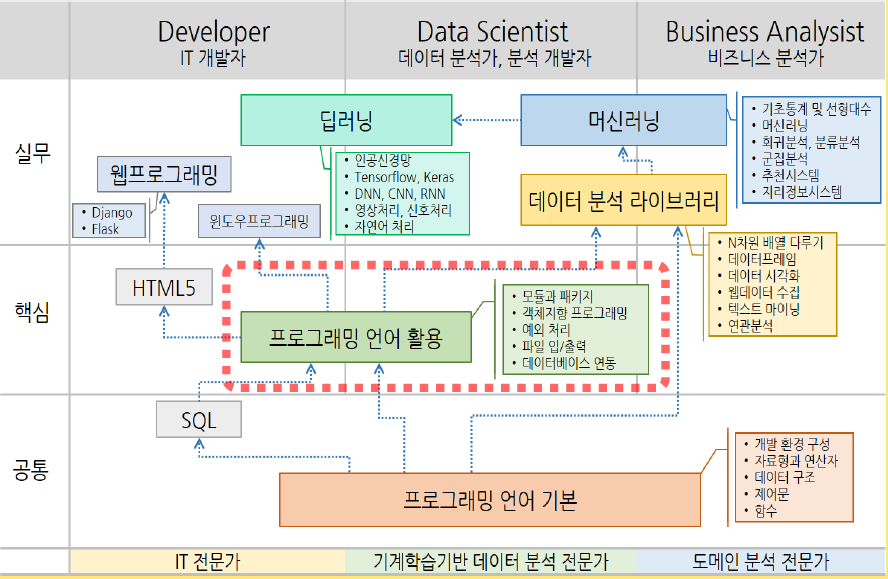